In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import Image

# Load

In [2]:
data = pd.read_csv('Data/insurance.csv')

In [3]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# EDA

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No NaN values in this data set

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Column "charges" shows high std

## Which age group is charged the most?

In [8]:
data['Age_Bin'] = pd.cut(data['age'], bins=5, precision=0)

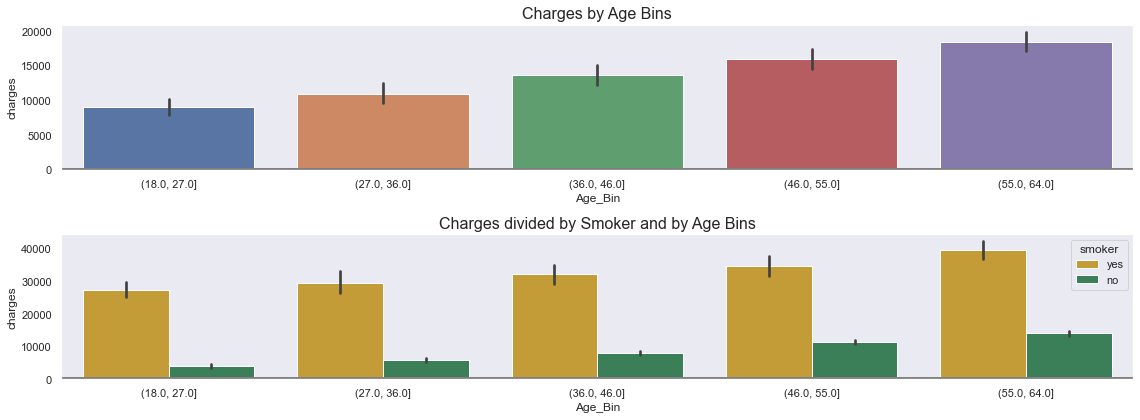

In [9]:
fig, axs = plt.subplots(2, figsize=(16,6))
axs[0].grid()
axs[0].axhline(y=0, color='grey', linewidth=4) 
axs[0].set_title('Charges by Age Bins', fontsize=16)
sns.barplot(x=data['Age_Bin'], y=data['charges'], ax=axs[0])

axs[1].grid()
axs[1].axhline(y=0, color='grey', linewidth=4) 
axs[1].set_title('Charges divided by Smoker and by Age Bins', fontsize=16)
sns.barplot(x=data['Age_Bin'], y=data['charges'], hue=data['smoker'], palette={'yes':'goldenrod', 'no':'seagreen'}, ax=axs[1])

plt.tight_layout()
plt.show()

## How big is the difference between Smoker and non Smoker?

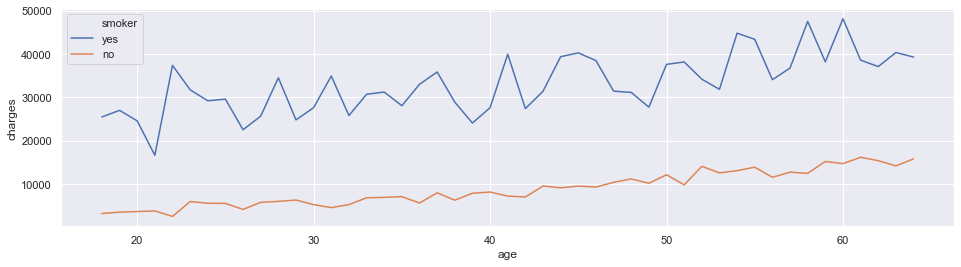

In [10]:
plt.figure(figsize=(16,4))
sns.lineplot(x='age', y='charges', data=data, hue='smoker', err_style=None)
plt.show()

* Charges for smokers are way higher than non smokers
* Age also has a big influence on the charges

## Who smokes more?

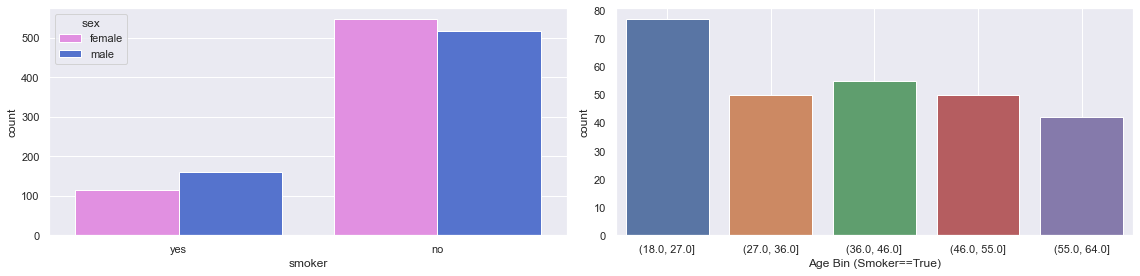

In [11]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,2,1)
sns.countplot(x=data['smoker'], hue=data['sex'], palette={'male':'royalblue', 'female':'violet'})

f.add_subplot(1,2,2)
data_smoker = data.query('smoker == "yes"')
sns.countplot(x=data_smoker['Age_Bin'])
plt.xlabel('Age Bin (Smoker==True)')

plt.grid()
plt.tight_layout()
plt.show()

## Where are people charged the most?

In [12]:
values = data.groupby('region')['charges'].sum()/data['charges'].sum()
colors=['lightblue', 'lightgreen', 'bisque', 'lightcoral']

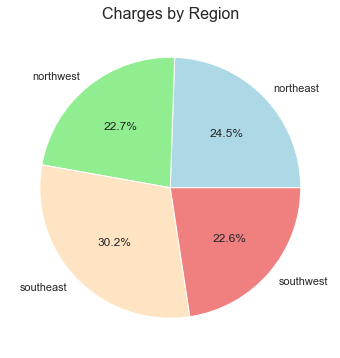

In [13]:
plt.figure(figsize=(6,6))
plt.pie(values, labels=values.index, autopct='%1.1f%%', colors=colors)
plt.title('Charges by Region', {'fontsize':16})
plt.show()

## Is bmi a critical factor?

**Here are the BMI Categories from the WHO (Wikipedia):**

<img src="img/bmi-groups-wikipedia.png" width="300" height="300" style="float:left"/>

* Change the groups so that there is only one underweight group

In [29]:
def bmi_categorizer(bmi):
    if (bmi < 18.5):
        return "Underweight"
    elif (bmi >= 18.5) and (bmi < 25):
        return "Normal weight"
    elif (bmi >= 25) and (bmi < 30):
        return "Overweight"
    elif (bmi >= 30) and (bmi < 35):
        return "Obese 1"
    elif (bmi >= 35) and (bmi < 40):
        return "Obese 2"
    elif (bmi >= 40):
        return "Obese 3"

In [32]:
data['BMI_Category'] = data['bmi'].apply(bmi_categorizer)

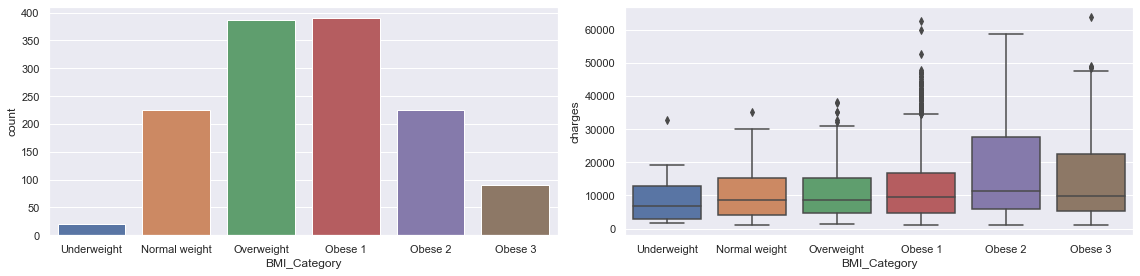

In [38]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,2,1)
sns.countplot(data['BMI_Category'], order=['Underweight', 'Normal weight', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3'])
f.add_subplot(1,2,2)
sns.boxplot(x=data['BMI_Category'], y=data['charges'], order=['Underweight', 'Normal weight', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3'])
plt.tight_layout()
plt.show()

In [ ]:
data.head()